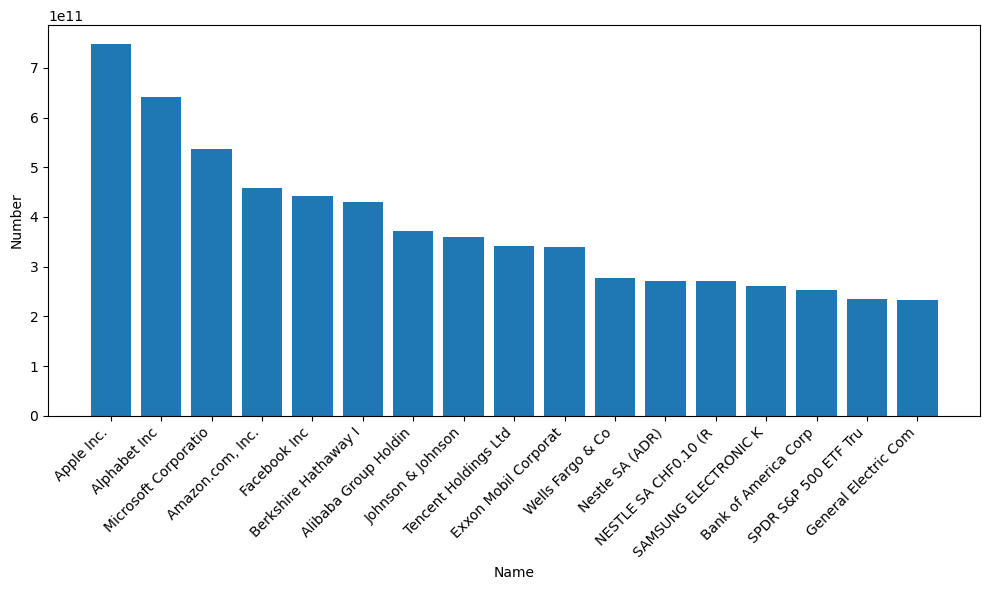

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'companies.csv'

df = pd.read_csv(file_path)
top_20 = df.nlargest(20, 'capitalization')

plt.figure(figsize=(10, 6))
plt.bar(top_20['name'], top_20['capitalization'])
plt.xlabel('Name')
plt.ylabel('Number')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.show()

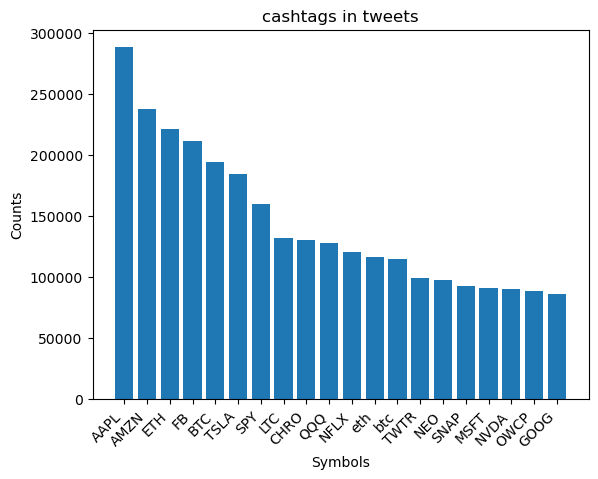

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import csv

ID = []
file_path = 'entities.csv'
with open(file_path, 'r') as file:
    csv_reader = csv.reader(file)
    
    header = next(csv_reader)
    column1_index = header.index('entity_type')  
    column2_index = header.index('text')
    
    for row in csv_reader:
        if row[column1_index] == 'symbol':
            ID.append(row[column2_index])

counter = Counter(ID)

most_common_elements = counter.most_common(20)

elements, counts = zip(*most_common_elements)

plt.bar(elements, counts)
plt.xlabel('Symbols')
plt.ylabel('Counts')
plt.title('cashtags in tweets')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

csv_file_path2 = 'companies.csv'
file_path = 'entities.csv'

df = pd.read_csv(csv_file_path2)
df2 = pd.read_csv(file_path)

column1 = df2['text']
column2 = df['ticker']
column3 = df['capitalization']
column4 = df['exchange']
cap = []
cou = []
colors = []

counter = Counter(column1)
most_common_elements = counter.most_common(1000)
elements, counts = zip(*most_common_elements)


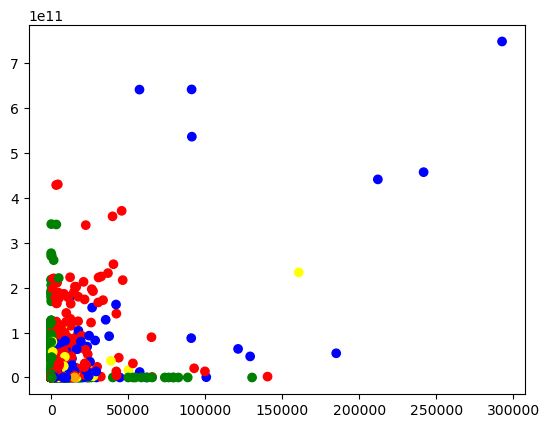

In [22]:
csv_file_path2 = 'companies.csv'
file_path = 'entities.csv'

df = pd.read_csv(csv_file_path2)
df2 = pd.read_csv(file_path)

for element in column2:
    if element in elements:
        target_index = df.index[df['ticker'] == element][0]  
        cap.append(df.loc[target_index, 'capitalization'])
        i = elements.index(element)
        cou.append(counts[i])
        exchange_value = df.loc[target_index, 'exchange']

        if exchange_value == 'NYSE':
            colors.append('red')
        elif exchange_value == 'OTCMKTS':
            colors.append('green')
        elif exchange_value == 'NASDAQ':
            colors.append('blue')
        elif exchange_value == 'NYSEMKT':
            colors.append('orange')
        elif exchange_value == 'NYSEARC':
            colors.append('purple')
        else:
            colors.append('yellow')


plt.scatter(cou, cap, c=colors)
plt.show()       

i didnt import all data because of a huge runtime for above figure

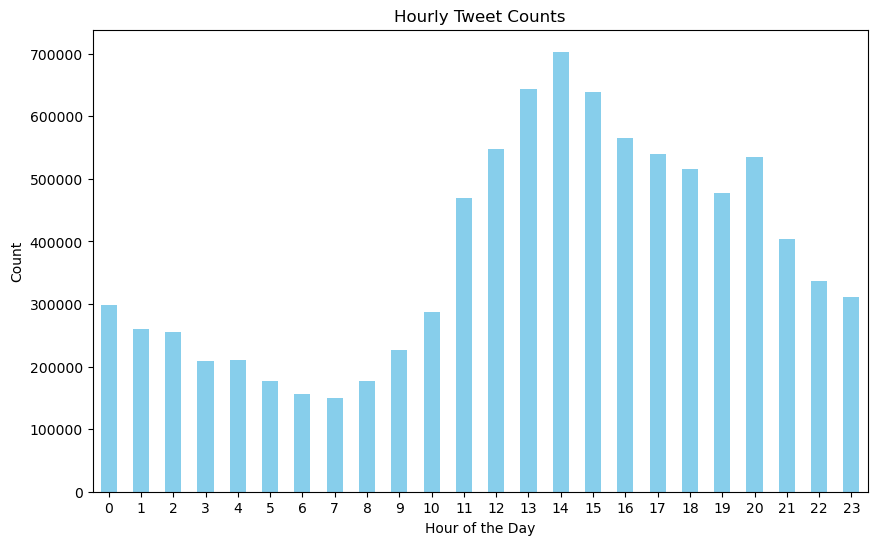

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'tweets.csv'
df = pd.read_csv(file_path)

df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

df['hour'] = df['created_at'].dt.hour

hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Hourly Tweet Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


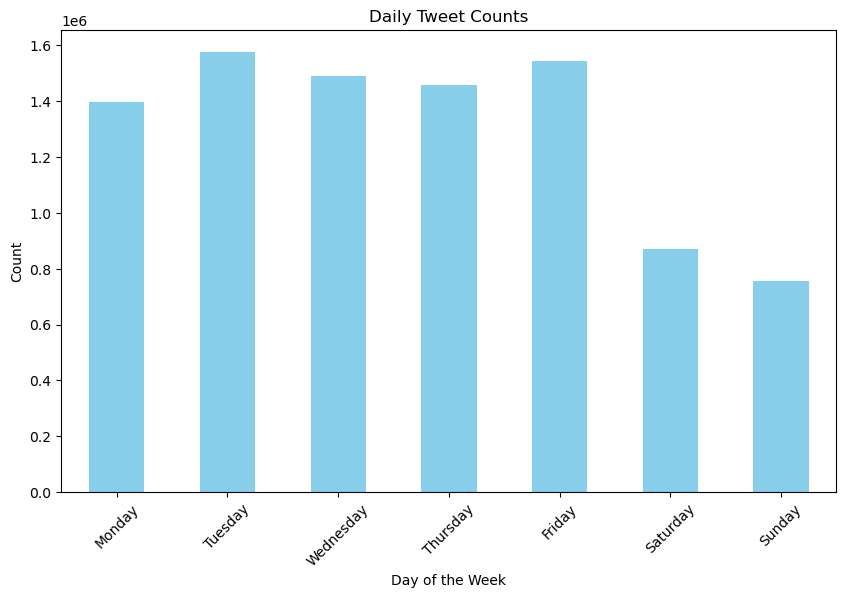

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'tweets.csv'
df = pd.read_csv(file_path)

df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

df['day_of_week'] = df['created_at'].dt.dayofweek

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = df['day_of_week'].map(lambda x: day_names[x])

daily_counts = df['day_name'].value_counts().reindex(day_names, fill_value=0)

plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar', color='skyblue')
plt.title('Daily Tweet Counts')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'tweets.csv'
file_path2 = 'entities.csv'

df = pd.read_csv(file_path)
df2 = pd.read_csv(file_path2)

aapl = []
amzn = []
r_aapl = []
r_amzn = []

aapl = df2.loc[df2['text'] == 'AAPL', 'tweet_id'].tolist()
amzn = df2.loc[df2['text'] == 'AMZN', 'tweet_id'].tolist()


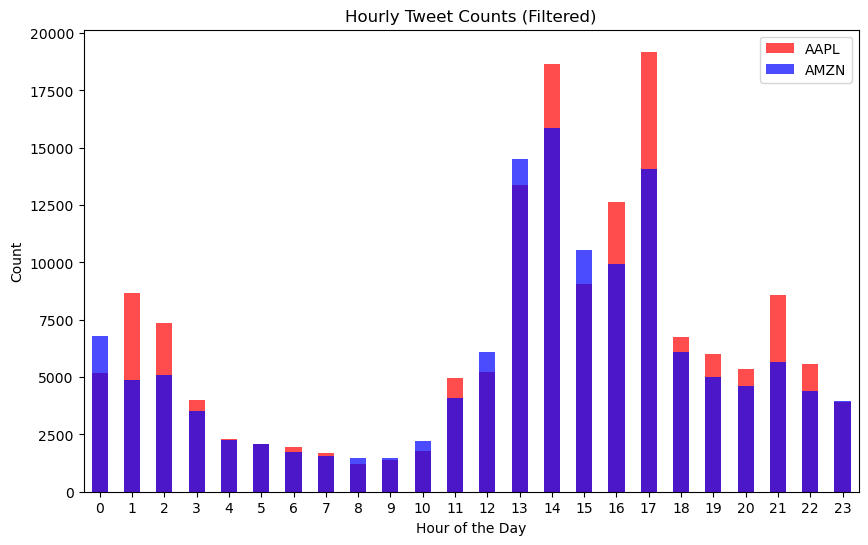

In [8]:

df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

df_filtered = df[df['retweeted_status_id'].isin(aapl + amzn)].copy()
df_filtered['hour'] = df_filtered['created_at'].dt.hour

# Separate data for AAPL and AMZN
aapl_data = df_filtered[df_filtered['retweeted_status_id'].isin(aapl)]
amzn_data = df_filtered[df_filtered['retweeted_status_id'].isin(amzn)]

# Plotting
plt.figure(figsize=(10, 6))
aapl_data['hour'].value_counts().sort_index().plot(kind='bar', color='red', alpha=0.7, label='AAPL')
amzn_data['hour'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7, label='AMZN')

plt.title('Hourly Tweet Counts (Filtered)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=0)
plt.show()


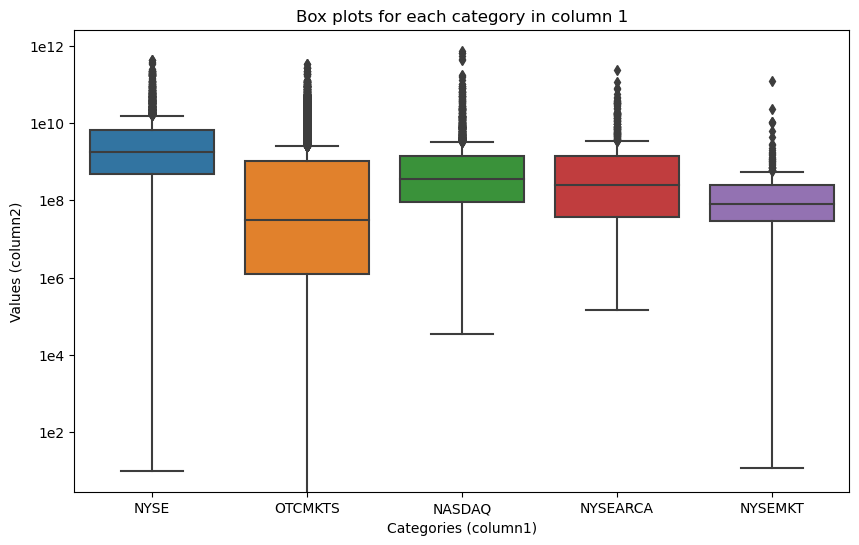

In [16]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'companies.csv'

df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
sns.boxplot(x='exchange', y='capitalization', data=df)
plt.yscale('log') 
plt.yticks([10**2, 10**4, 10**6, 10**8, 10**10, 10**12], ['1e2', '1e4', '1e6', '1e8', '1e10', '1e12'])  # Set y-axis tick labels
plt.title('Box plots for each category in column 1')
plt.xlabel('Categories (column1)')
plt.ylabel('Values (column2)')
plt.suptitle('')  
plt.show()

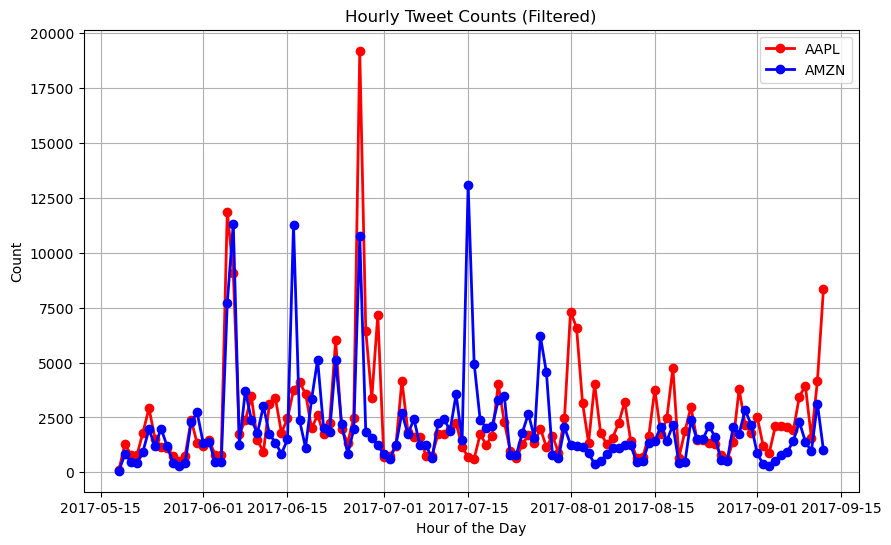

In [21]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

df_filtered = df[df['id'].isin(aapl + amzn)].copy()
df_filtered['date'] = df_filtered['created_at'].dt.date

aapl_data = df_filtered[df_filtered['id'].isin(aapl)]
amzn_data = df_filtered[df_filtered['id'].isin(amzn)]
plt.figure(figsize=(10, 6))

aapl_data['date'].value_counts().sort_index().plot(kind='line', color='red', marker='o', label='AAPL', linewidth=2)

amzn_data['date'].value_counts().sort_index().plot(kind='line', color='blue', marker='o', label='AMZN', linewidth=2)

plt.title('Hourly Tweet Counts (Filtered)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
